In [30]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import warnings
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [31]:
df1=pd.read_csv("./archive/Friday-WorkingHours-Afternoon-DDos.csv")#,nrows = 50000
df2=pd.read_csv("./archive/Friday-WorkingHours-Afternoon-PortScan.csv")
df3=pd.read_csv("./archive/Friday-WorkingHours-Morning.csv")
df4=pd.read_csv("./archive/Monday-WorkingHours.csv")
df5=pd.read_csv("./archive/Thursday-WorkingHours-Afternoon-Infilteration.csv")
df6=pd.read_csv("./archive/Thursday-WorkingHours-Morning-WebAttacks.csv")
df7=pd.read_csv("./archive/Tuesday-WorkingHours.csv")
df8=pd.read_csv("./archive/Wednesday-workingHours.csv")

In [32]:
# df = pd.concat([df1,df2])
# del df1,df2
# df = pd.concat([df,df3])
# del df3
# df = pd.concat([df,df4])
# del df4
# df = pd.concat([df,df5])
# del df5
# df = pd.concat([df,df6])
# del df6
# df = pd.concat([df,df7])
# del df7
# df = pd.concat([df,df8])
# del df8
df=df1
nRow, nCol = df.shape
print(f'U tabeli ima {nRow} redova i {nCol} kolona')

U tabeli ima 225745 redova i 79 kolona


In [33]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [35]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

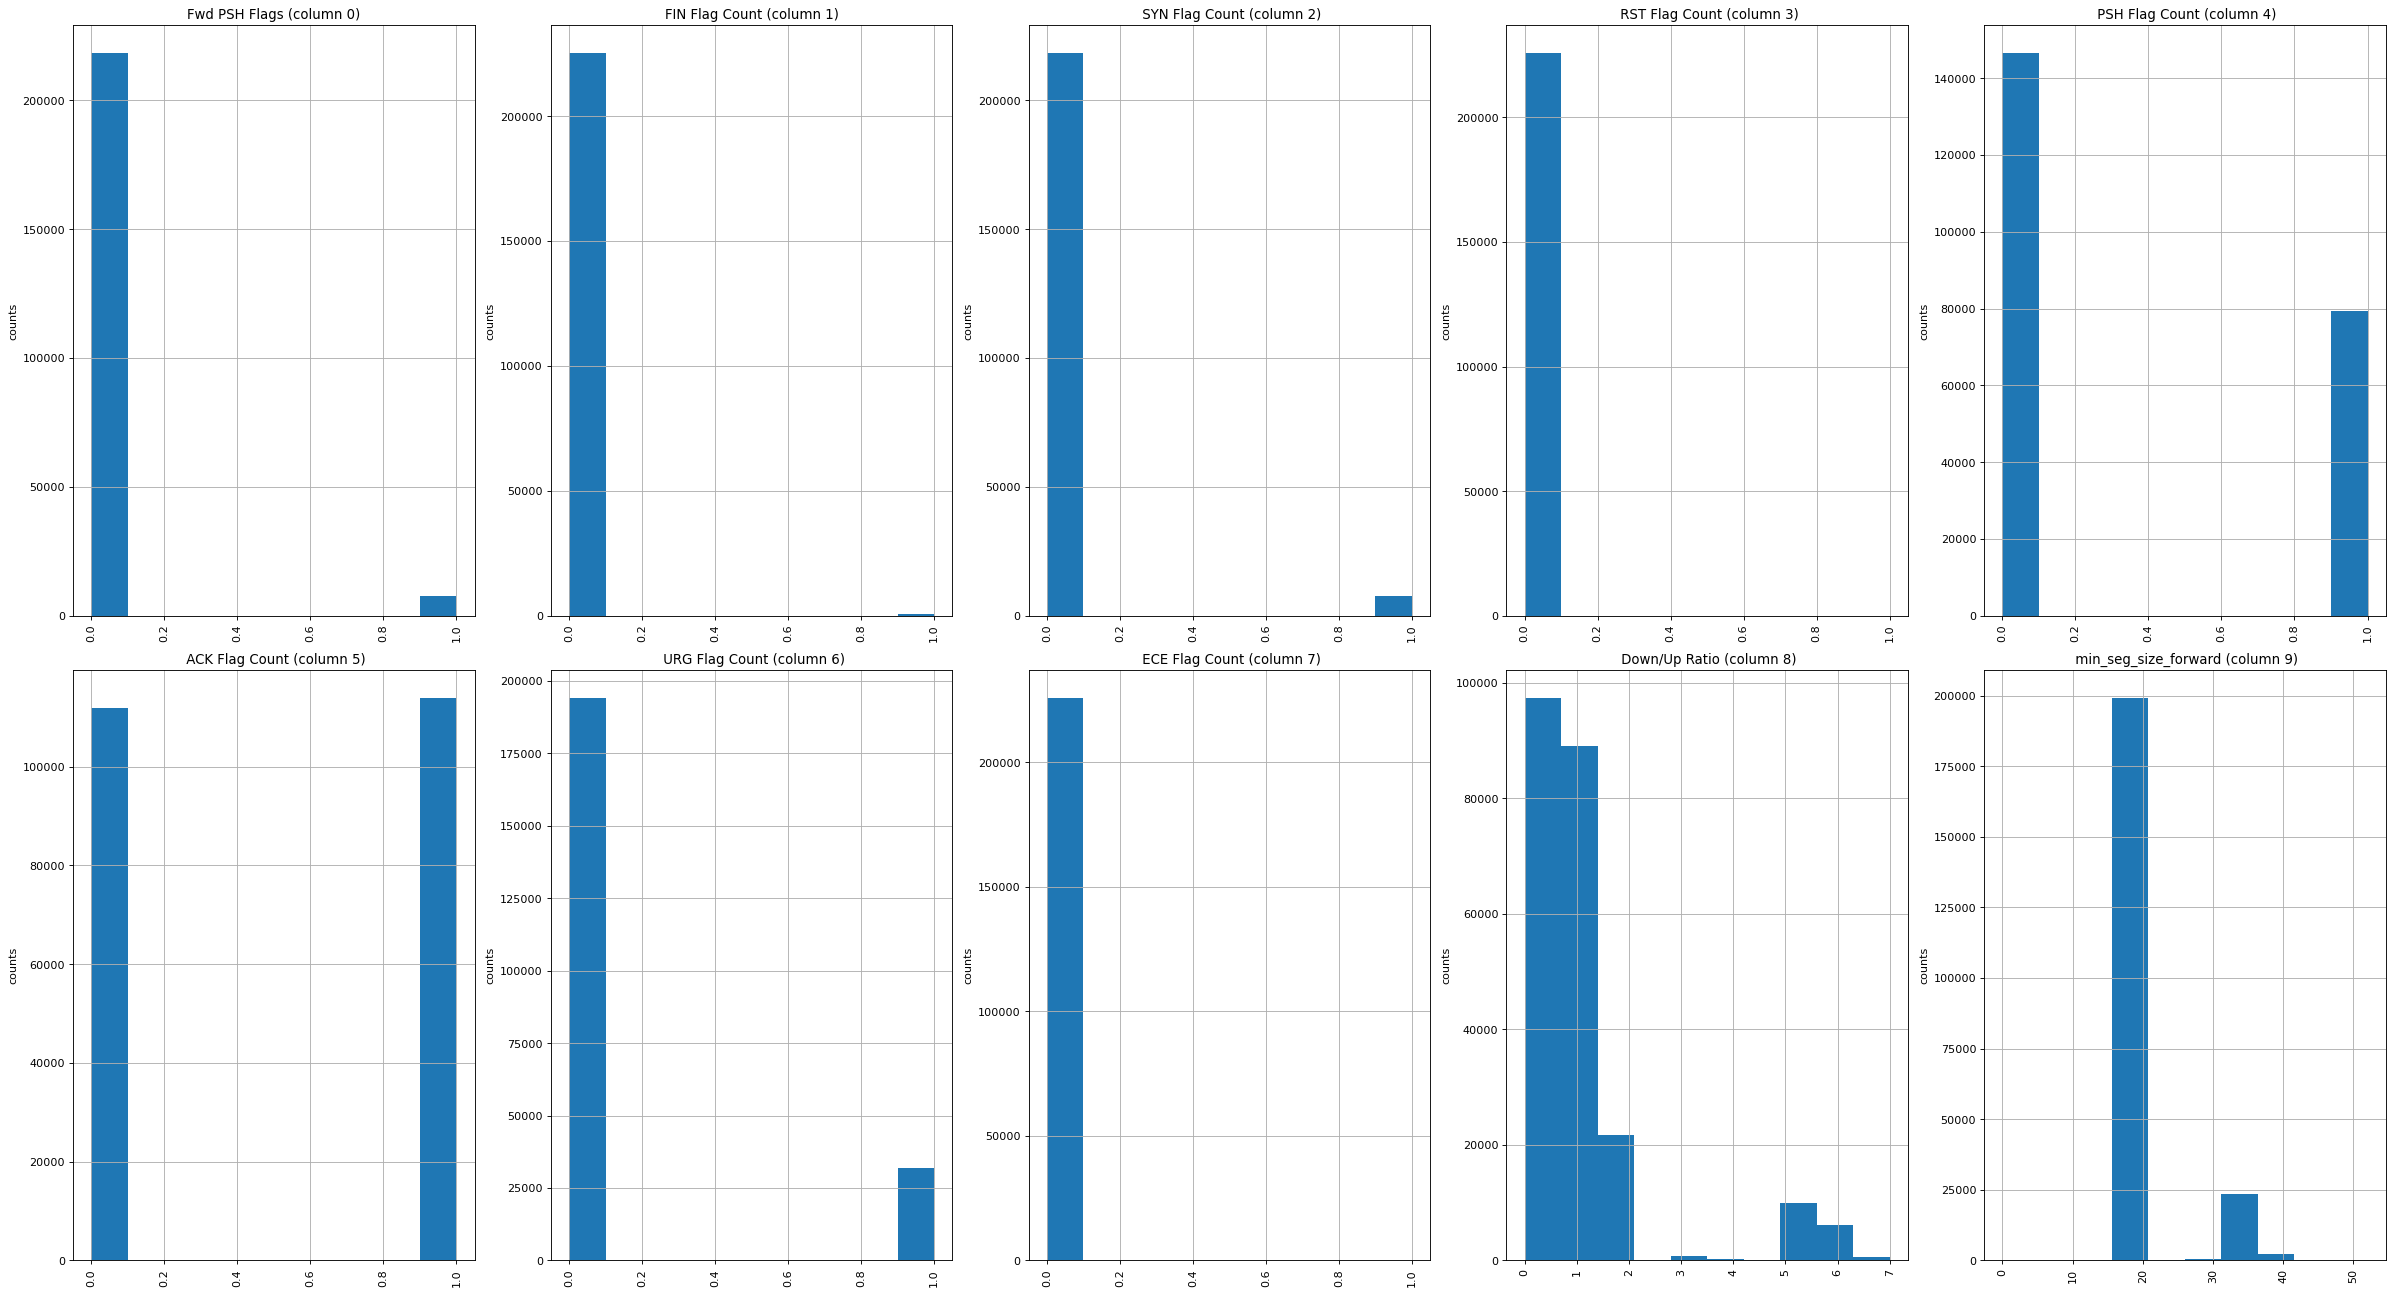

In [36]:
plotPerColumnDistribution(df,10,5)

In [37]:
df[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

In [38]:
old_memory_usage = df.memory_usage().sum()
#change the variable types for low memory usage
#int64 to int32,,, float64 to float32
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int32  
 1    Flow Duration                225745 non-null  int32  
 2    Total Fwd Packets            225745 non-null  int32  
 3    Total Backward Packets       225745 non-null  int32  
 4   Total Length of Fwd Packets   225745 non-null  int32  
 5    Total Length of Bwd Packets  225745 non-null  int32  
 6    Fwd Packet Length Max        225745 non-null  int32  
 7    Fwd Packet Length Min        225745 non-null  int32  
 8    Fwd Packet Length Mean       225745 non-null  float32
 9    Fwd Packet Length Std        225745 non-null  float32
 10  Bwd Packet Length Max         225745 non-null  int32  
 11   Bwd Packet Length Min        225745 non-null  int32  
 12   Bwd Packet Length Mean       225745 non-nul

In [39]:
new_memory_usage = df.memory_usage().sum()
old_vs_new = (old_memory_usage - new_memory_usage) / old_memory_usage * 100
print(f"%{old_vs_new} lower memory usage")

%49.367044316962925 lower memory usage


In [40]:
# drop one variable features 
one_variable_list = []
for i in df.columns:
    if df[i].value_counts().nunique() < 2:
        one_variable_list.append(i)
df.drop(one_variable_list,axis=1,inplace=True)
df.columns =  df.columns.str.strip()

In [41]:
df.shape

(225745, 69)

In [42]:
# drop nan and infinite rows
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [43]:
df.shape

(225711, 69)

In [44]:
# merging similar classes with low instances
df["Label"] = df["Label"].replace(["Web Attack � Brute Force","Web Attack � XSS","Web Attack � Sql Injection"],"Web Attack")

In [45]:
df =  df.drop_duplicates(keep="first")
df.reset_index(drop=True,inplace=True)

In [46]:
df.shape

(223082, 69)

In [47]:
#feature reduction 
#dropping very high correlated features 
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df =  df.drop(to_drop, axis=1)
df.shape

(223082, 30)

In [48]:
x = df.drop(["Label"],axis=1)
y = df["Label"]

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

#Podela podataka
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.35,random_state=42,stratify=y)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [52]:
startNB = time.time()

#나이브 베이즈
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train,Y_train)
print('나이브베이즈 모델링 ',time.time()-startNB)

startDT = time.time()
#디시전 트리
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
DTC_Classifier.fit(X_train,Y_train)
print('디시전 트리 모델링 ',time.time()-startDT)

startKNN = time.time()
#knn 
KNN_Classifier = KNeighborsClassifier(n_jobs=-1,n_neighbors=3,metric='minkowski',algorithm='auto')
KNN_Classifier.fit(X_train,Y_train)
print('knn 모델링 ',time.time()-startKNN)

나이브베이즈 모델링  0.41299939155578613
디시전 트리 모델링  0.9500303268432617
knn 모델링  32.94574594497681


In [53]:
from sklearn import metrics

models=[]
models.append(('Naive',BNB_Classifier))
models.append(('Decision',DTC_Classifier))
models.append(('KNeighbor',KNN_Classifier))

for i,v in models:
    startNB = time.time()
    scores = cross_val_score(v,X_train,Y_train,cv=7)
    accuracy = metrics.accuracy_score(Y_train,v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train,v.predict(X_train))
    classification = metrics.classification_report(Y_train,v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
   
    print()
    
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print('모델링 시간',time.time()-startNB)


============================== Naive Model Evaluation ==============================

Cross Validation Mean Score:
 0.9837589460021915

Model Accuracy:
 0.9841589484355496

Confusion matrix:
 [[59603  2191]
 [  106 83103]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      0.96      0.98     61794
        DDoS       0.97      1.00      0.99     83209

    accuracy                           0.98    145003
   macro avg       0.99      0.98      0.98    145003
weighted avg       0.98      0.98      0.98    145003


모델링 시간 7.9256367683410645

============================== Decision Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998482800949651

Model Accuracy:
 1.0

Confusion matrix:
 [[61794     0]
 [    0 83209]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     61794
        DDoS       1.00      1.00      1.00     832

In [54]:
def plot_confusion_matrix(cm,
                          title,
                          cmap=None,
                          target_names=None,
                          normalize=False
                         ):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)


In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import scikitplot as skplt

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))

for i, v in models:
    
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    plot_confusion_matrix(cm=confusion_matrix ,title= i)

ModuleNotFoundError: No module named 'scikitplot'